# Credit card fraud detection

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, f1_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [18]:
df = pd.read_csv('data/creditcard.csv')

In [20]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are no missing values in the data.

In [74]:
df[df['Class'] == 0].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [75]:
df[df['Class'] == 1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


All features of normal transactions have mean and median ~0 and most features of the fraud transaction don't.

In [22]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

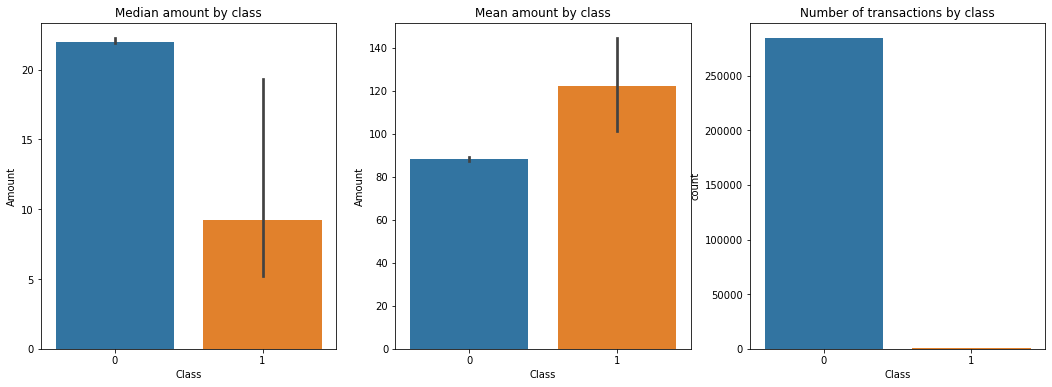

In [79]:
plt.figure(figsize=(18,6))

plt.subplot(1, 3, 1)
sns.barplot(data=df, x='Class', y='Amount', estimator=np.median)
plt.title('Median amount by class')

plt.subplot(1, 3, 2)
sns.barplot(data=df, x='Class', y='Amount', estimator=np.mean)
plt.title('Mean amount by class')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='Class')
plt.title('Number of transactions by class')

plt.show()

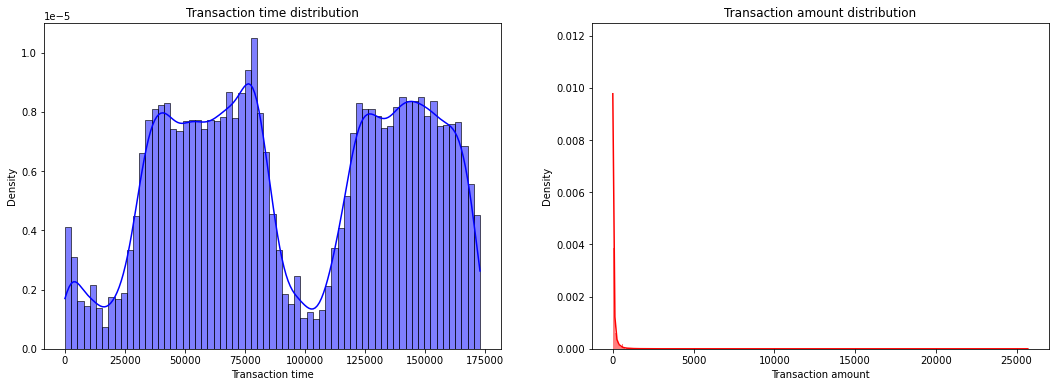

In [97]:
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
sns.histplot(df, x='Time', kde=True, stat='density', color='blue')
plt.xlabel('Transaction time')
plt.title('Transaction time distribution')

plt.subplot(1, 2, 2)
sns.histplot(df, x='Amount', kde=True, stat='density', color='red', )
plt.xlabel('Transaction amount')
plt.title('Transaction amount distribution')
plt.ylim((0, 0.0125))

plt.show()

In [137]:
fraud = df[df['Class'] == 1]
no_fraud = df[df['Class'] == 0].sample(n=len(fraud))
eq_distrib = pd.concat([fraud, no_fraud])

In [138]:
correlation = eq_distrib.corr()

In [139]:
correlation['Class'].sort_values(ascending=False).to_frame('Correlation')

,Correlation
Class,1.000000
V4,0.716190
V11,0.685015
V2,0.502296
V19,0.259902
V20,0.171991
V21,0.132336
Amount,0.101003
V28,0.089644
V27,0.078287


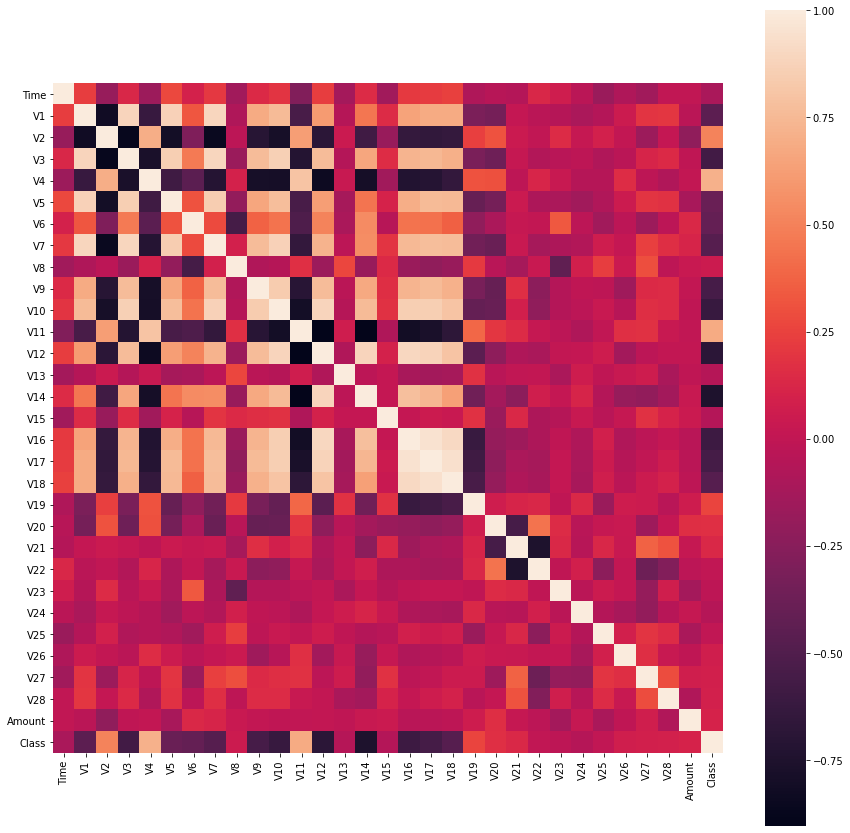

In [140]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation, square=True)
plt.show()

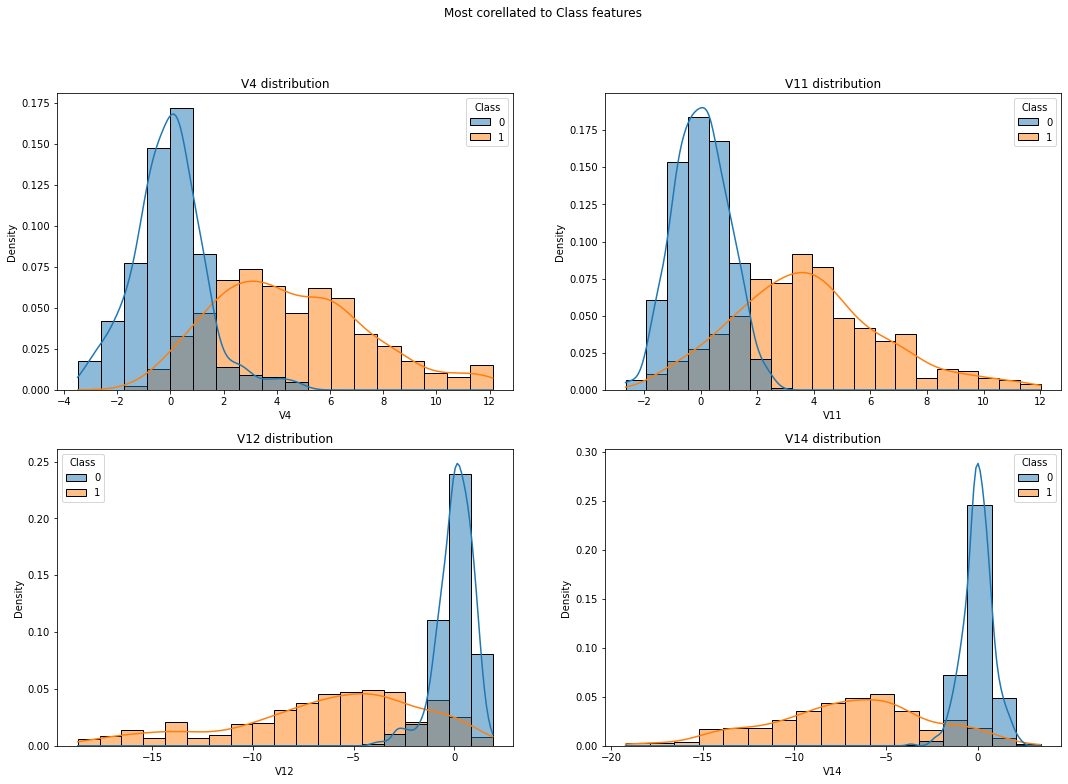

In [146]:
plt.figure(figsize=(18,12))

plt.subplot(2, 2, 1)
sns.histplot(eq_distrib, x='V4', kde=True, stat='density', hue='Class')
plt.title('V4 distribution')

plt.subplot(2, 2, 2)
sns.histplot(eq_distrib, x='V11', kde=True, stat='density', hue='Class')
plt.title('V11 distribution')

plt.subplot(2, 2, 3)
sns.histplot(eq_distrib, x='V12', kde=True, stat='density', hue='Class')
plt.title('V12 distribution')

plt.subplot(2, 2, 4)
sns.histplot(eq_distrib, x='V14', kde=True, stat='density', hue='Class')
plt.title('V14 distribution')

plt.suptitle('Most corellated to Class features')
plt.show()

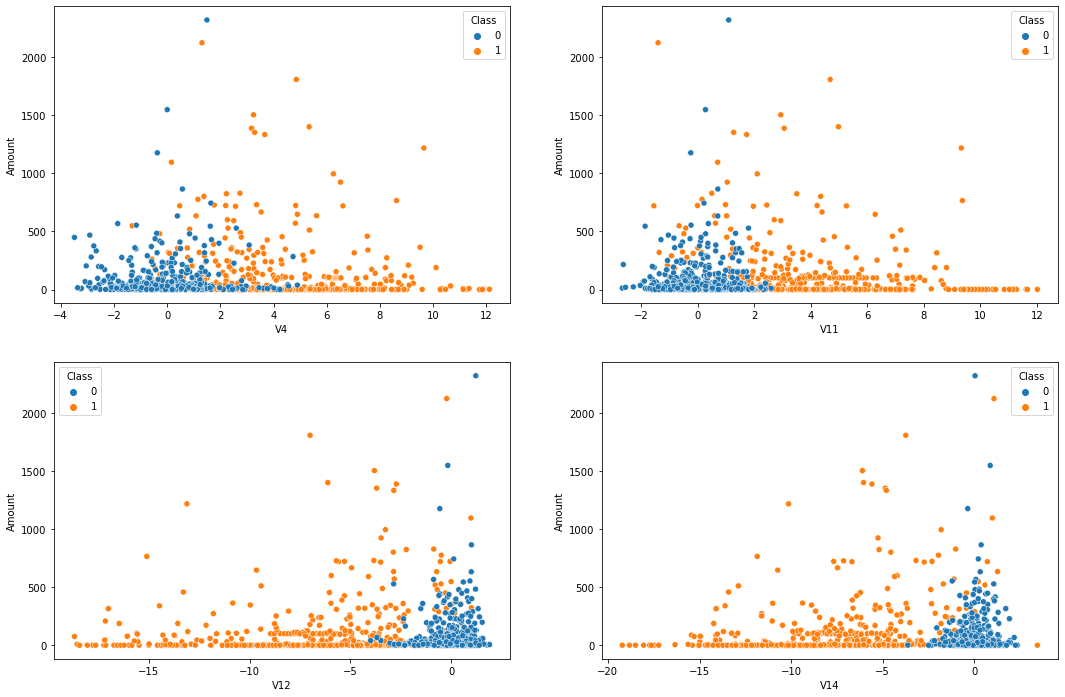

In [151]:
plt.figure(figsize=(18,12))

plt.subplot(2, 2, 1)
sns.scatterplot(data=eq_distrib, x='V4', y='Amount', hue='Class')

plt.subplot(2, 2, 2)
sns.scatterplot(data=eq_distrib, x='V11', y='Amount', hue='Class')

plt.subplot(2, 2, 3)
sns.scatterplot(data=eq_distrib, x='V12', y='Amount', hue='Class')

plt.subplot(2, 2, 4)
sns.scatterplot(data=eq_distrib, x='V14', y='Amount', hue='Class')

plt.show()

In [152]:
undersample = RandomUnderSampler(sampling_strategy='majority')

In [153]:
X = df.drop(columns='Class')
y = df['Class'].values

In [154]:
X_under, y_under = undersample.fit_resample(X, y)

In [155]:
clf = RandomForestClassifier(n_jobs=-1, random_state=42)
logreg = LogisticRegression(n_jobs=-1)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2)

In [157]:
logreg.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [158]:
logreg.score(X_test, y_test)

0.9035532994923858

In [122]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

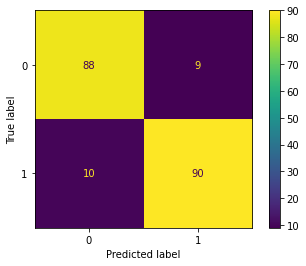

In [159]:
plot_confusion_matrix(logreg, X_test, y_test)

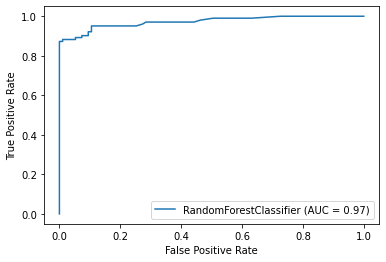

In [124]:
plot_roc_curve(clf, X_test, y_test)

In [127]:
f1_score(y_test, clf.predict(X_test))

0.9137055837563451